# Carregar conjunto de documentos

In [2]:
import os
from itertools import islice

path="/home/leonard/Faculdades/ESTACIO/Projetos/IC/2017-2018/Luiz/Dados/SistMicroprocessadores"
def encontraArquivosEmPastaRecursivamente(pasta, extensao):
    arquivosTxt = []
    caminhoAbsoluto = os.path.abspath(pasta)
    for pastaAtual, subPastas, arquivos  in os.walk(caminhoAbsoluto):
        arquivosTxt.extend([os.path.join(pastaAtual,arquivo) for arquivo in arquivos if arquivo.endswith('.txt')])
    return arquivosTxt


arquivos = encontraArquivosEmPastaRecursivamente(path, '.txt')

'''
Padrão do arquivo
1a linha: <nota atribuída> de <valor da questão>
2a linha: em branco
3a linha em diante: resposta
'''
corpus_respostas=[]
for a in arquivos:
    arq = open(a,'r')
    with open(a) as lines:
        #lines = arq.readlines()
        lines = [lines.rstrip("\n") for lines in arq] #retirar o caracter de fim de linha
        # then skip the next 2
        for line in islice(lines, 3):
            pass
        corpus_respostas.append(line)
    arq.close()
print(len(corpus_respostas))

16


**ETAPA** 1
===
Avaliar a qualidade das respostas, independente do gabarito, pautadas na ocorrência de:
1. erros de grafia;
2. erros gramaticais;  

In [2]:
#respostas = ['Tais comandos devem ser colocados dentro de um bloco try. Porque no caso de ocorrer um exceção no bloco try, ela será lançado, os demais comandos da bloco serão suspensos, e o controle passará para o primeiro bloco catch que tenha um parâmetro de modelo compatível com a exceção lançada.','Tais comandos devem ser colocados dentro de um bloco try. Porque no caso de ocorrer um exceção no bloco try, ela será lançado, os demais comandos da bloco serão suspensos, e o controle passará para o primeiro bloco catch que tenha um parâmetro de tipo compatível com a exceção lançada.','Tais comandos devem ser colocados dentro de um bloco try. Porque no caso de ocorrer um exceção no bloco try, ela será lançado, os demais comandos da bloco serão suspensos, e o controle passará para o primeiro bloco catch que tenha um parâmetro de tipo compatível com a exceção lançada.','Tais comandos devem ser colocados dentro de um bloco try. Porque no caso de ocorrer um exceção no bloco try, ela será lançado, os demais comandos da bloco serão suspensos, e o controle passará para o primeiro bloco catch que tenha um parâmetro de tipo compatível com a exceção lançada.']

import re
import SpellChecker as sc
from nltk.corpus import wordnet

respostasSemPontuacao=[]
for cr in corpus_respostas:
    respostasSemPontuacao.append(re.sub('[:->(),.-]', '', cr))

corpus_words=[]     
for r in respostasSemPontuacao:
    words = r.lower().split()
    corpus_words.append(words)

    
# Verifica o número de erros entre os termos e a correção

doc_size = len(words)
i=0
for doc in corpus_words:        
    errors = 0
    i=i+1
    print("\n\nDOC%d" %i)
    for w in doc:
        if not wordnet.synsets(w): #se o termo não estiver em inglês
            if w != sc.correction(w):
                print(w," ~> ",sc.correction(w))
                errors+=1
    err_per=(errors/doc_size)*100
    print(errors,"erro(s)\n(%%): %.2f" %err_per)

DOC1
dsc  ~>  doc
-  ~>  a
controlador  ~>  consolador
3 erro(s)
(%): 15.79
DOC2
atualizar  ~>  naturalizar
registrador  ~>  registrado
2 erro(s)
(%): 10.53
DOC3
esvio  ~>  desvio
básica  ~>  música
2 erro(s)
(%): 10.53
DOC4
incondicional  ~>  condicional
-  ~>  a
-  ~>  a
sequencia  ~>  esquecia
4 erro(s)
(%): 21.05
DOC5
sequencia  ~>  esquecia
condicão  ~>  condição
incondicional  ~>  condicional
sequencia  ~>  esquecia
4 erro(s)
(%): 21.05
DOC6
incondicional  ~>  condicional
incondicional  ~>  condicional
quano  ~>  quando
necessario  ~>  necessário
4 erro(s)
(%): 21.05
DOC7
basicamente  ~>  fisicamente
incondicional  ~>  condicional
incondicional  ~>  condicional
3 erro(s)
(%): 15.79
DOC8
0 erro(s)
(%): 0.00
DOC9
sequencia  ~>  esquecia
incondicional  ~>  condicional
memoria  ~>  memória
ocorra  ~>  ocorre
validado  ~>  validade
5 erro(s)
(%): 26.32
DOC10
sequencia  ~>  esquecia
execuçao  ~>  execução
incondicional  ~>  condicional
incondicional  ~>  condicional
quano  ~>  quando
s

ANÁLISE GRAMATICAL
===
> A Análise gramatical é realizada sobre o conjunto de respostas original, ou seja, considera-se o texto na íntegra, com pontuações, etc.

> Uso do Cogroo (https://github.com/gpassero/cogroo4py) para análise gramatical

* Deve-se executar o arquivo cogroo4py.jar no console

> ``` $ java -jar cogroo4py.jar & ```


In [14]:
from cogroo_interface import Cogroo

cogroo = Cogroo.Instance()
# Avalia cada sentença de cada resposta, apresentando o(s) erro(s) da determinada 
#sentença
i=0
for r in corpus_respostas:
    sdoc = cogroo.grammar_check(r)
    i=i+1
    print("\n ========= DOC %d ===========" %i)
    for s in sdoc.sentences:
        str_sentences = str(s)
        d = cogroo.grammar_check(str_sentences)
        err = d.mistakes
        if err: 
            print("\n",str_sentences," ~ ",err)
    print("Erros: ", len(sdoc.mistakes))


 ========= DOC 1 ===========
Erros:  0

 ========= DOC 2 ===========

 Assim, após o tratamento do evento, o sistema volta a operar à partir de onde ocorreu o desvio.  ~  [[xml:4] Não acontece crase antes de verbo.]
Erros:  1

 ========= DOC 3 ===========
Erros:  0

 ========= DOC 4 ===========
Erros:  0

 ========= DOC 5 ===========
Erros:  0

 ========= DOC 6 ===========
Erros:  0

 ========= DOC 7 ===========

 desvios incondicional e desvios condicional.  ~  [[xml:17] O adjetivo concorda com o substantivo a que se refere., [xml:17] O adjetivo concorda com o substantivo a que se refere.]
Erros:  2

 ========= DOC 8 ===========
Erros:  0

 ========= DOC 9 ===========
Erros:  0

 ========= DOC 10 ===========
Erros:  0

 ========= DOC 11 ===========
Erros:  0

 ========= DOC 12 ===========
Erros:  0

 ========= DOC 13 ===========

 Quando da problema no registrador (program counter) ou no controlador do programa para microcontroladores.  ~  [[xml:114] Os determinantes concordam com o 


ETAPA 1.ii) 
===
Verificar Similaridade entre documentos (especificar que tipos de métricas foram utilizadas - string-based; term-based)

444.0


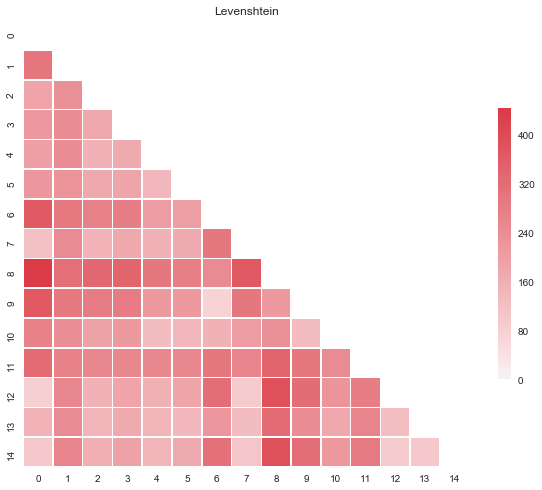

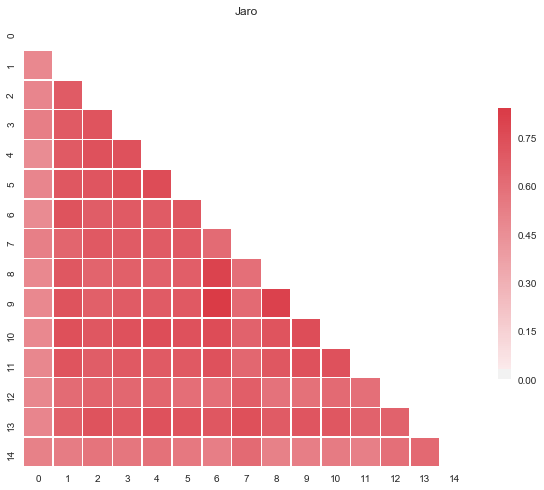

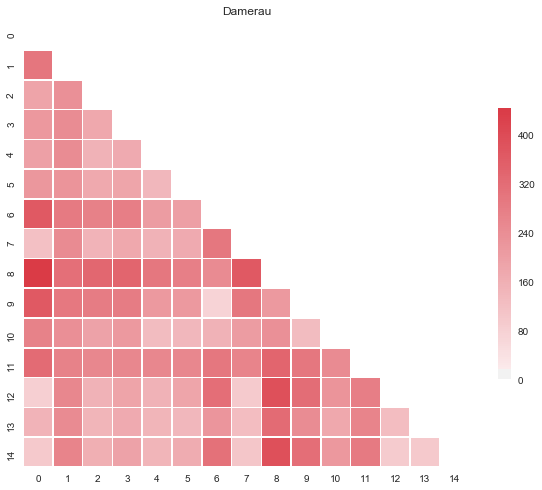

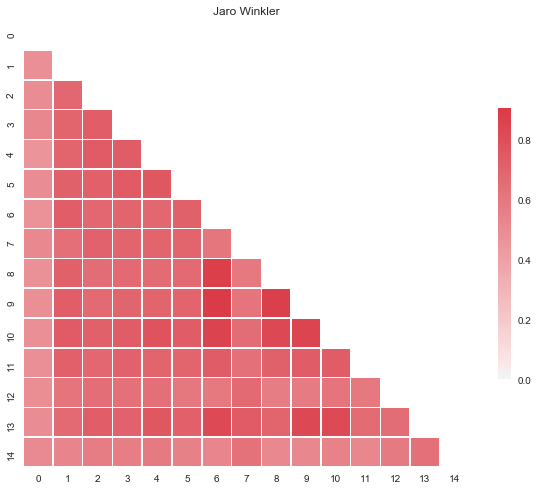

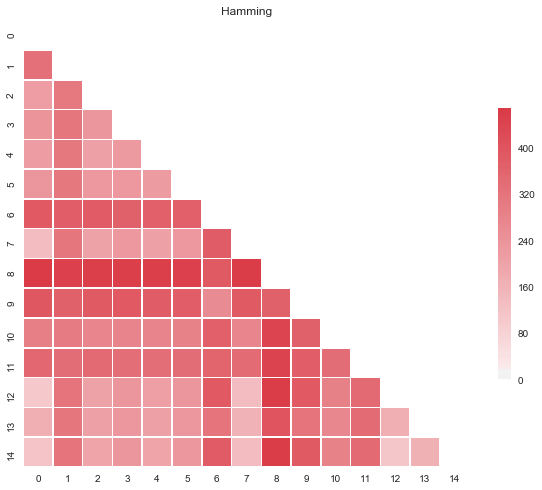

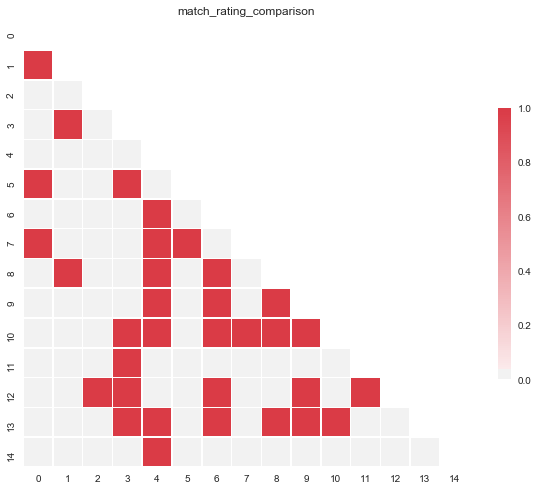

In [4]:
from similarity2 import *
print(numpy.nanmax(sim(levenshtein,corpus_respostas)))
grafico_similaridade(sim(levenshtein,corpus_respostas),"Levenshtein")
grafico_similaridade(sim(jaro,corpus_respostas),"Jaro")
grafico_similaridade(sim(damerau,corpus_respostas),"Damerau")
grafico_similaridade(sim(jaro_winkler,corpus_respostas),"Jaro Winkler")
grafico_similaridade(sim(hamming,corpus_respostas),"Hamming")
grafico_similaridade(sim(match_rating_comparison,corpus_respostas),"match_rating_comparison")



ETAPA 2
====
Avaliar a similaridade das respostas com base no gabarito. Esta fase é composta pelas seguintes subetapas:
1. Construir um dicionário de sinônimos com base no gabarito, onde o termo do gabarito é a chave.
2. Avaliar termos de cada uma das respostas. Na existência de sinônimos, o termo será substituído pela respectiva  chave do dicionário.

### Etapa 2.1

In [5]:
import nltk
from pysinonimos.sinonimos import Search, historic
gabarito = ['Tais comandos devem ser colocados dentro de um bloco try. Porque no caso de ocorrer um exceção no bloco try, ela será lançado, os demais comandos da bloco serão suspensos, e o controle passará para o primeiro bloco catch que tenha um parâmetro de tipo compatível com a exceção lançada.']
stopwords = nltk.corpus.stopwords.words('portuguese')


gabaritoSemPontuacao=[]
for g in gabarito: 
    gabaritoSemPontuacao.append(re.sub('[,.]', '', g)) #retirar pontuação

words=[]    
for g in gabaritoSemPontuacao:
	words = g.lower().split() #colocar em caixa baixa e dividir sentença em termos


dicionario = dict()
#Cria dicionário com palavras do gabarito que não estão nas stopwords
for w in words: 
    if w not in stopwords:
        dicionario[w]=[]


#Cada chave do dicionário é atribuída a respectiva lista de sinônimos
for k in iter(dicionario.keys()):
    key = Search(k)
    syn = key.synonyms()
    if (isinstance(syn,list)):
        dicionario[k]=syn
        


### Etapa 2.2

In [6]:
'''
Parâmetros:
values -> dicionário
searchFor - > termo de pesquisa 

Retorno:
a chave correspondente ao parâmetro especificado em searchFor
'''
def search(values, searchFor):
    for k in values:
        for v in values[k]:
            if searchFor in v:
                return k
    return None 


#Procura em cada resposta a existência do termo como valor no dicionário. 
#Caso exista, troca o termo sinônimo pela chave
normalizedString = []
for index,r in enumerate(respostasSemPontuacao):
    sentence = []
    words = r.lower().split()
    for w in words:
        if w not in stopwords:
            syn =search(dicionario,w)
            if w != syn and syn!= None:
                sentence.append(syn)
            else:
                sentence.append(w)

    normalizedString.append(' '.join([str(x) for x in sentence]))
#print(corpus_respostas)
#print(normalizedString)
    
       

['DSC - Controlador Digital de Sinais', 'watchdog timer: esse temporizador reinicializa o microcontrolador (sistema operacional), quando ocorre a falha em atualizar o registrador. Logo, esse evento externo é enviado para um endereço pré-definido, onde o mesmo será tratado. Assim, após o tratamento do evento, o sistema volta a operar à partir de onde ocorreu o desvio.', 'Um desvio em um programa ocorre quando alguma condição esvio prevista ocorre anteriormente à instrução de desvio. A instrução de desvio básica é a GOTO, que leva o programa para a linha determinada nesta instrução.', 'Incondicional -> ocorre independente de qualquer fator. Nesse caso ocorrera o GOTO. Condicional -> depende de algumas condições a serem atendidas a partir de testes. Esses desvios ocorrem quando o programa sai da sua sequencia de funcionamento.', 'Ocorre quando um programa sai da sua sequencia por uma condicão ou sozinho. Desvio incondicional: ocorre quando o programa sai da sequencia nominal da execução e

### Etapa 2.3: 
> Representar textos por meio da abordagem bag-of-words com esquema de ponderação tf-idf

In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
import pandas as pd

documents = normalizedString

tfidf = TfidfVectorizer(ngram_range=(1,3))
X = tfidf.fit_transform(documents).todense()
#X = tfidf.fit_transform(documents)
print(X)
 
true_k = 2
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

#Imprimir a matrix tfidf
corpus_index = [documents.index(n) for n in documents]
df = pd.DataFrame(X, index=corpus_index, columns=tfidf.get_feature_names())
print(df)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.10562736 0.10562736 0.10562736]
 [0.12942077 0.12942077 0.12942077 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
      alguma  alguma tipo  alguma tipo exceção   algumas  algumas condições  \
0   0.000000     0.000000             0.000000  0.000000           0.000000   
1   0.000000     0.000000             0.000000  0.000000           0.000000   
2   0.129421     0.129421             0.129421  0.000000           0.000000   
3   0.000000     0.000000             0.000000  0.128322           0.128322   
4   0.000000     0.000000             0.000000  0.000000           0.000000   
5   0.000000     0.000000             0.000000  0.000000           0.000000   
6  

### Avaliar qualidade dos cluster com o coeficiente silhueta

For n_clusters = 2 The average silhouette_score is : 0.06343033687165552


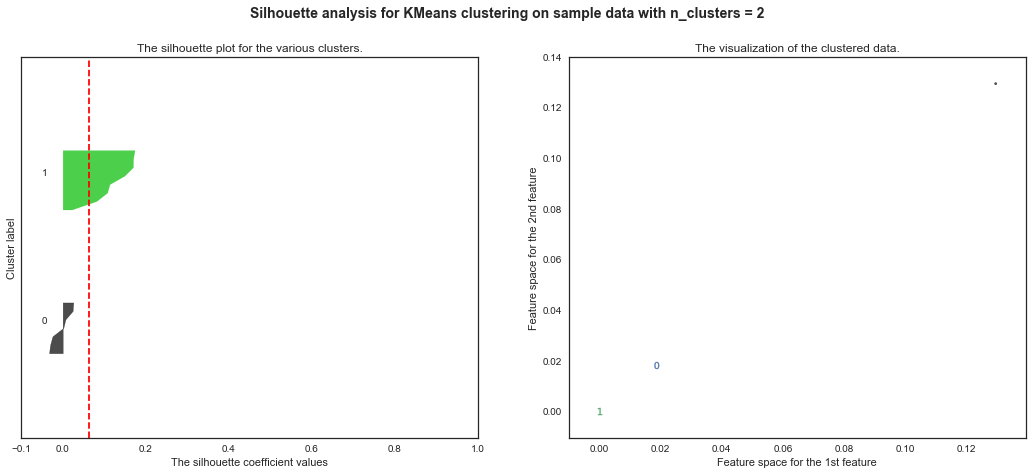

For n_clusters = 3 The average silhouette_score is : 0.06378073115637634


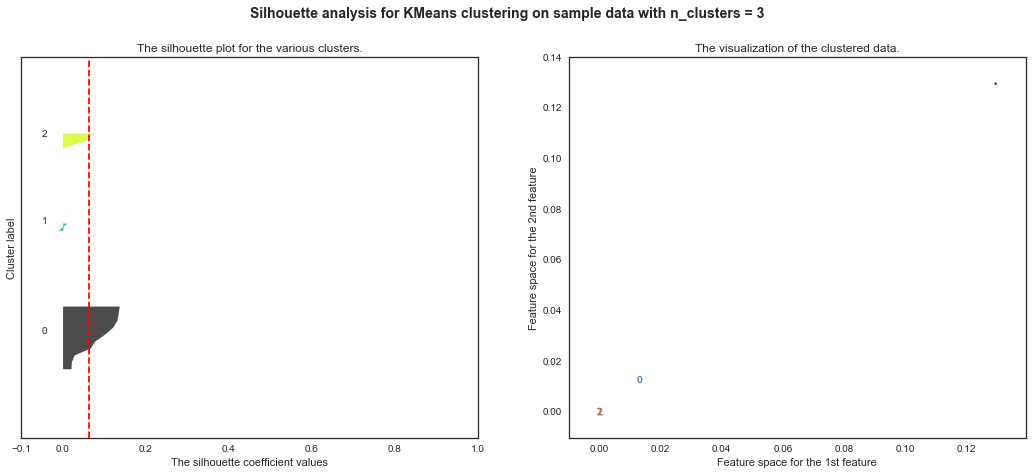

For n_clusters = 4 The average silhouette_score is : 0.04941802044565402


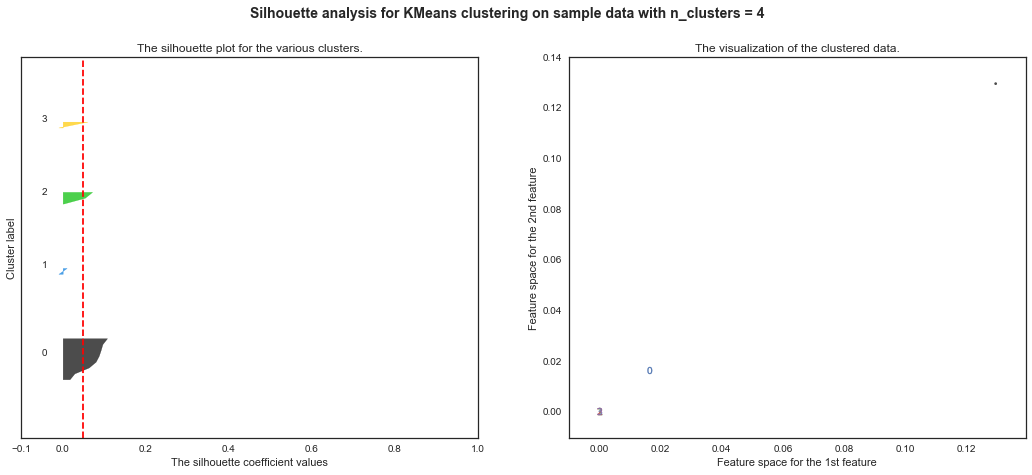

For n_clusters = 5 The average silhouette_score is : 0.054590901129554524


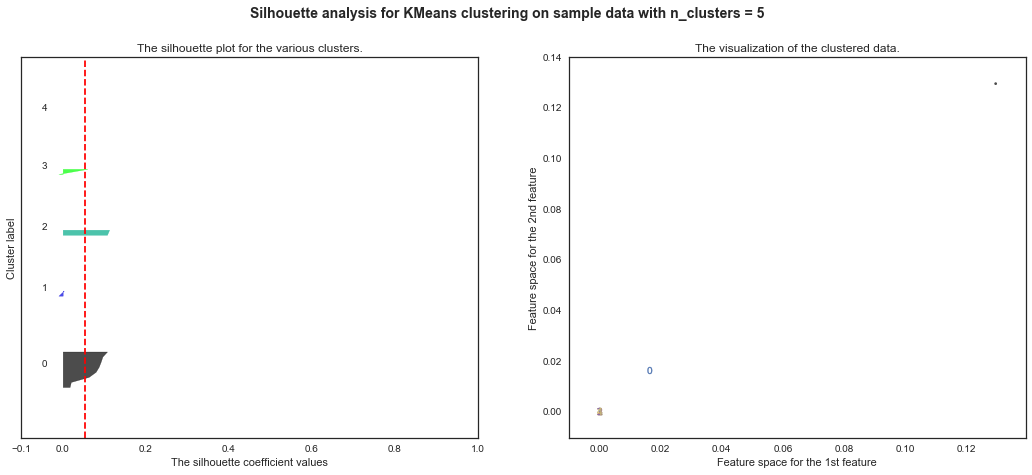

In [52]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score

#tfidf = TfidfVectorizer(stop_words='english')
#X = tfidf.fit_transform(documents)


X_scaled = X

cluster_range = range(2, 6)

for n_clusters in cluster_range:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X_scaled) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict( X_scaled )

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    print("For n_clusters =", n_clusters,
        "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_scaled, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
        sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                        0, ith_cluster_silhouette_values,
                        facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhoutte score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter([X_scaled[:, 0]], [X_scaled[:, 1]], marker='.', s=30, lw=0, alpha=0.7, c=colors)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter([centers[:, 0]],[centers[:, 1]],
              marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(centers):
        ax2.scatter([c[0]], [c[1]], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                "with n_clusters = %d" % n_clusters),
               fontsize=14, fontweight='bold')

    plt.show()

In [ ]:
import